<h1>Energy and water disclosure</h1>

<h3>Firstly we to import all the required libraries </h3>

In [123]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")


In [124]:
pd.set_option("display.max_columns",None)

In [125]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286.0,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,NaN,NaN,NaN,NaN,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,NaN,NaN,NaN,51600000.0,NaN,NaN,38139374.2,11100000.0,6962.2,0.0,6962.2,762051,NaN,NaN,619.4,5/1/2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400.0,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,NaN,NaN,NaN,NaN,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,NaN,19600000.0,NaN,NaN,NaN,-391000000.0,933073441.0,9330734.4,332365924.0,96300000.0,55870.4,51016.4,4854.1,3889181,NaN,NaN,404.3,4/27/2017 11:23,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400.0,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,NaN,NaN,NaN,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342,NaN,NaN,NaN,4/27/2017 11:23,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400.0,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,NaN,NaN,NaN,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748,NaN,NaN,NaN,4/27/2017 11:23,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400.0,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medi

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          422 non-null    float64
 4   Parent Property Name                                        422 non-null    object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

<h3>now we have to find the null values of all the columns </h3>

In [127]:
data.isnull().mean()*100

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                            96.407288
Parent Property Name                                          96.407288
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

<h3>Here i make a new list in which have to name which has null values above than 30% i simply drop that column </h3>

In [128]:
listabove_30=["Parent Property Id","Water Intensity (All Water Sources) (gal/ft²)","Water Use (All Water Sources) (kgal)","District Steam Use (kBtu)",
              "Diesel #2 Use (kBtu)","Diesel #2 Use (kBtu)","Fuel Oil #5 & 6 Use (kBtu)","Fuel Oil #4 Use (kBtu)","Fuel Oil #2 Use (kBtu)",
              "Fuel Oil #1 Use (kBtu)","Metered Areas  (Water)","3rd Largest Property Use Type - Gross Floor Area (ft²)","3rd Largest Property Use Type",
              "2nd Largest Property Use - Gross Floor Area (ft²)","2nd Largest Property Use","Address 2","Parent Property Name","Parent Property Id"]

for column in data:
    if column in listabove_30 :
        del data[column]
data            

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,NaN,1963,2,100,Whole Building,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11100000.0,6962.2,0.0,6962.2,762051,619.4,5/1/2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,NaN,1969,12,100,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96300000.0,55870.4,51016.4,4854.1,3889181,404.3,4/27/2017 11:23,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342,NaN,4/27/2017 11:23,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748,NaN,4/27/2017 11:23,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,NaN,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694,NaN,4/27/2017 11:23,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,3002380026,3-00238-0026\t,3001927,24 Monroe Place,11218,22,MONROE PLACE,Brooklyn,70645.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,74177.0,NaN,1928,1,100,Whole Building,98.0,81.4,87.0,3.3,0.8,114.9,5179599.9,56168.9,857323.0,245251.1,354.7,275.1,79.6,74177,109.6,4/26/2017 11:20,NaN,NaN,40.696420,-73.992495,2.0,33.0,502.0,Br

In [129]:
rvm_bynature = ["Order","Property Id","NYC Borough, Block and Lot (BBL) self-reported","Address 1 (self-reported)","Property Name","DOF Benchmarking Submission Status","Latitude","Longitude","Street Name"]
data=data.drop(rvm_bynature,axis=1)

In [130]:
data.dtypes

BBL - 10 digits                                                object
NYC Building Identification Number (BIN)                       object
Postal Code                                                    object
Street Number                                                  object
Borough                                                        object
DOF Gross Floor Area                                          float64
Primary Property Type - Self Selected                          object
List of All Property Use Types at Property                     object
Largest Property Use Type                                      object
Largest Property Use Type - Gross Floor Area (ft²)            float64
2nd Largest Property Use Type                                  object
Year Built                                                      int64
Number of Buildings - Self-reported                             int64
Occupancy                                                       int64
Metered Areas (Energ

In [131]:
data.head()

,BBL - 10 digits,NYC Building Identification Number (BIN),Postal Code,Street Number,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
0,1013160001,1037549,10017,675,Manhattan,289356.0,Office,Office,Office,293447.0,NaN,1963,2,100,Whole Building,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11100000.0,6962.2,0.0,6962.2,762051,619.4,5/1/2017 17:32,No,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,1021380040,1084198; 1084387;1084385; 1084386; 1084388; 10...,10032,180,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,NaN,1969,12,100,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96300000.0,55870.4,51016.4,4854.1,3889181,404.3,4/27/2017 11:23,No,12.0,10.0,251.0,Washington Heights South ...
2,1021380030,1063380,10032,3975,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342,NaN,4/27/2017 11:23,No,12.0,10.0,251.0,Washington Heights South ...
3,1021390001,1087281; 1076746,10032,161,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748,NaN,4/27/2017 11:23,No,12.0,10.0,255.0,Washington Heights South ...
4,1021390085,1063403,10032,193,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,NaN,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694,NaN,4/27/2017 11:23,No,12.0,10.0,255.0,Washington Heights South ...


<h3>Here i store categorical variable and numerical in different dataframe</h3>

In [132]:
list_of_cat=[]
for feature in data:
    if data[feature].dtype == 'O' : 
        list_of_cat.append(feature)
print("list of categorical data",list_of_cat)
dfcat=data[list_of_cat]

list of categorical data ['BBL - 10 digits', 'NYC Building Identification Number (BIN)', 'Postal Code', 'Street Number', 'Borough', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property', 'Largest Property Use Type', '2nd Largest Property Use Type', 'Metered Areas (Energy)', 'Release Date', 'Water Required?', 'NTA']


In [133]:
dfcat.head()

,BBL - 10 digits,NYC Building Identification Number (BIN),Postal Code,Street Number,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,2nd Largest Property Use Type,Metered Areas (Energy),Release Date,Water Required?,NTA
0,1013160001,1037549,10017,675,Manhattan,Office,Office,Office,NaN,Whole Building,5/1/2017 17:32,No,Turtle Bay-East Midtown ...
1,1021380040,1084198; 1084387;1084385; 1084386; 1084388; 10...,10032,180,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,Whole Building,4/27/2017 11:23,No,Washington Heights South ...
2,1021380030,1063380,10032,3975,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,4/27/2017 11:23,No,Washington Heights South ...
3,1021390001,1087281; 1076746,10032,161,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,4/27/2017 11:23,No,Washington Heights South ...
4,1021390085,1063403,10032,193,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,NaN,4/27/2017 11:23,No,Washington Heights South ...


<h3>From above step we find out that some of the numerical column is in object datatype so we have to change it and store them in the numerical dataframe </h3>

In [134]:
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   BBL - 10 digits                             11735 non-null  object
 1   NYC Building Identification Number (BIN)    11584 non-null  object
 2   Postal Code                                 11746 non-null  object
 3   Street Number                               11622 non-null  object
 4   Borough                                     11628 non-null  object
 5   Primary Property Type - Self Selected       11746 non-null  object
 6   List of All Property Use Types at Property  11746 non-null  object
 7   Largest Property Use Type                   11744 non-null  object
 8   2nd Largest Property Use Type               3741 non-null   object
 9   Metered Areas (Energy)                      11689 non-null  object
 10  Release Date          

In [102]:
#dfcat['Release Date'] = pd.to_datetime(dfcat['Release Date'].str.strip(), format='%d/%m/%Y')

In [135]:
list_of_num=[]
for feature in data:
    if data[feature].dtype != 'O' : 
        list_of_num.append(feature)
print("list of numerical data",list_of_num)

list of numerical data ['DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)', 'Community Board', 'Council District', 'Census Tract']


In [136]:
dfnum=data[list_of_num]
dfnum.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Community Board,Council District,Census Tract
0,289356.0,293447.0,1963,2,100,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11100000.0,6962.2,0.0,6962.2,762051,619.4,6.0,4.0,88.0
1,3693539.0,3889181.0,1969,12,100,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96300000.0,55870.4,51016.4,4854.1,3889181,404.3,12.0,10.0,251.0
2,152765.0,231342.0,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342,NaN,12.0,10.0,251.0
3,891040.0,1305748.0,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748,NaN,12.0,10.0,255.0
4,211400.0,179694.0,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694,NaN,12.0,10.0,255.0


In [137]:
dfnum.corr() 

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Community Board,Council District,Census Tract
DOF Gross Floor Area,1.000000,0.829291,0.103228,0.058583,-0.021242,0.006877,0.019109,0.017061,0.007130,0.014428,0.017751,0.110087,0.114659,0.264046,0.279639,0.117354,0.100678,0.072278,0.828542,0.023444,-0.078634,-0.108475,0.051045
Largest Property Use Type - Gross Floor Area (ft²),0.829291,1.000000,0.081042,0.150296,-0.031043,0.017734,0.009563,0.009192,-0.003154,0.006922,0.009147,0.081085,0.081977,0.293500,0.291979,0.091689,0.073013,0.075441,0.987986,0.009314,-0.084811,-0.107610,0.023283
Year Built,0.103228,0.081042,1.000000,0.004136,0.001829,-0.118181,0.020198,0.020774,0.003964,0.019080,0.021038,0.010556,0.010918,0.037726,0.037037,0.012925,0.009866,0.012042,0.082290,0.020416,-0.039303,0.114223,0.024097
Number of Buildings - Self-reported,0.058583,0.150296,0.004136,1.000000,0.008121,-0.020564,-0.000421,-0.000455,-0.002741,0.000331,-0.000783,0.007154,0.007328,0.025263,0.025214,0.006662,0.007057,-0.000325,0.146739,-0.000787,0.015907,0.040598,0.012541
Occupancy,-0.021242,-0.031043,0.001829,0.008121,1.000000,-0.031116,-0.010646,-0.013070,0.002451,-0.013212,-0.012810,-0.000069,-0.000314,-0.014654,-0.017862,-0.001041,0.000314,-0.004774,-0.033009,-0.010225,0.079148,0.040034,0.025632
ENERGY STAR Score,0.006877,0.017734,-0.118181,-0.020564,-0.031116,1.000000,-0.036123,-0.035227,-0.067762,-0.023008,-0.040913,-0.026170,-0.026219,-0.066330,-0.065789,-0.047934,-0.026355,-0.040326,0.016800,-0.042873,0.064054,0.063185,-0.001607
Site EUI (kBtu/ft²),0.019109,0.009563,0.020198,-0.000421,-0.010646,-0.036123,1.000000,0.999645,0.156147,0.980949,0.996574,0.274167,0.283313,0.035173,0.034655,0.297063,0.270755,0.130630,0.011123,0.994421,-0.008674,0.010331,0.013376
Weather Normalized Site EUI (kBtu/ft²),0.017061,0.009192,0.020774,-0.000455,-0.013070,-0.035227,0.999645,1.000000,0.146811,0.983178,0.995697,0.264158,0.273375,0.032499,0.032482,0.286014,0.261562,0.122923,0.010757,0.993345,-0.009037,0.011931,0.012966
Weather Normalized Site Electricity Intensity (kWh/ft²),0.007130,-0.003154,0.003964,-0.002741,0.002451,-0.067762,0.156147,0.146811,1.000000,0.103620,0.233377,0.000397,0.000358,0.619948,0.619331,0.030086,0.000281,0.032407,-0.002102,0.249249,0.022974,0.013403,-0.009622
Weather Normalized Site Natural Gas Intensity (therms/ft²),0.014428,0.006922,0.019080,0.000331,-0.013212,-0.023008,0.980949,0.983178,0.103620,1.000000,0.970850,0.270063,0.279483,-0.001050,-0.001194,0.259588,0.270052,-0.000458,0.008054,0.965141,-0.007504,0.018648,0.014126


In [138]:
list_ofpoor=['Census Tract','Site EUI (kBtu/ft²)','Weather Normalized Source EUI (kBtu/ft²)',
             'Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)',
             'Source EUI (kBtu/ft²)','Indirect GHG Emissions (Metric Tons CO2e)',
             'Property GFA - Self-Reported (ft²)']


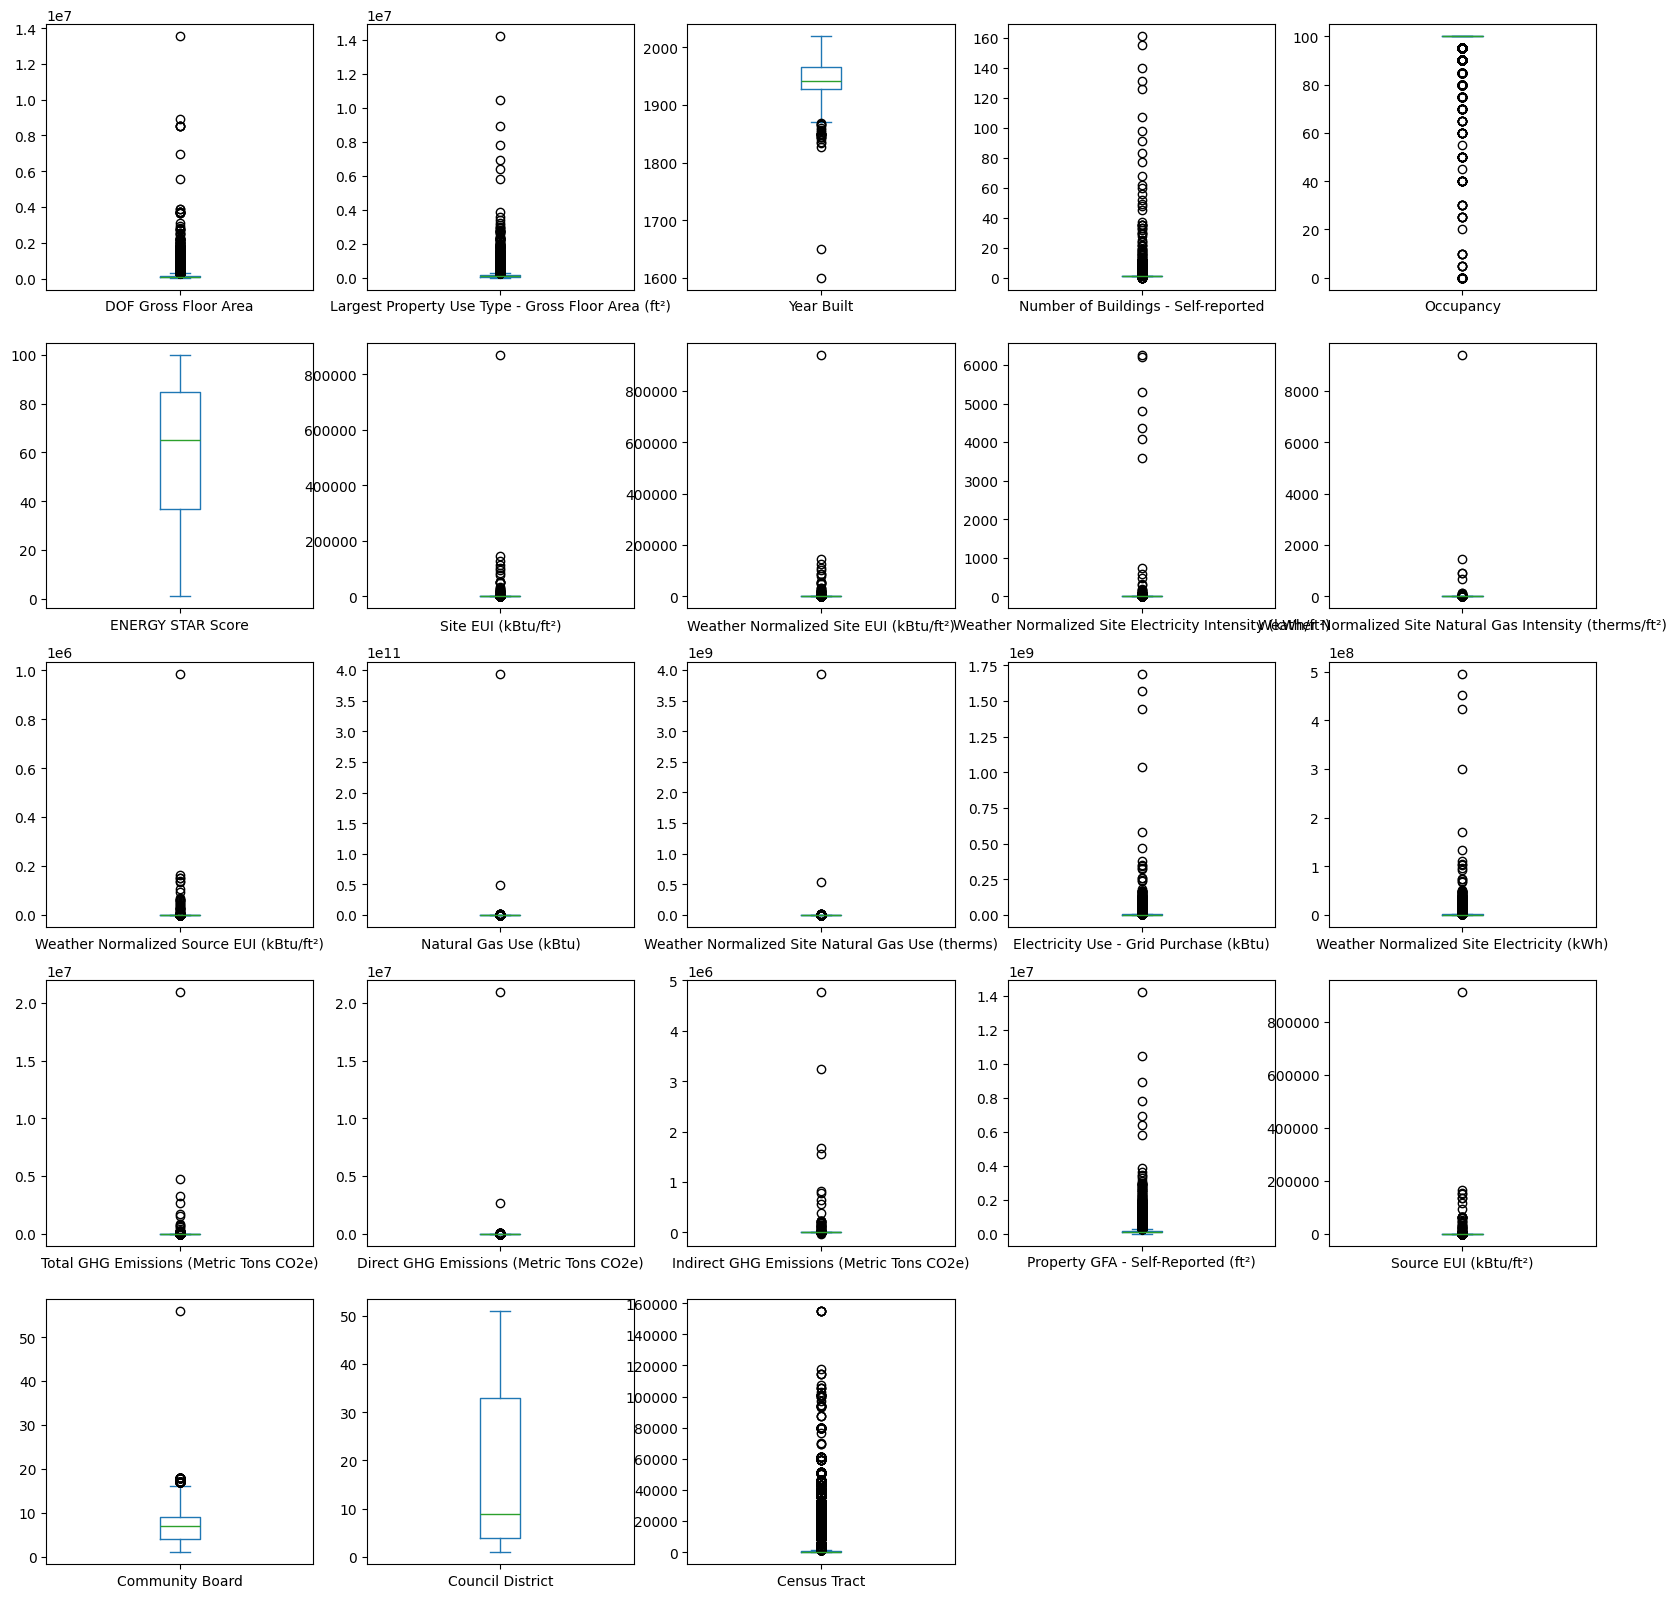

In [139]:
dfnum.plot(kind="box", subplots=True, layout=(5,5), figsize=(20,20))
plt.show()

In [140]:
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        11628 non-null  float64
 1   Largest Property Use Type - Gross Floor Area (ft²)          11744 non-null  float64
 2   Year Built                                                  11746 non-null  int64  
 3   Number of Buildings - Self-reported                         11746 non-null  int64  
 4   Occupancy                                                   11746 non-null  int64  
 5   ENERGY STAR Score                                           9642 non-null   float64
 6   Site EUI (kBtu/ft²)                                         11583 non-null  float64
 7   Weather Normalized Site EUI (kBtu/ft²)                      10281 non-null  float64
 

In [141]:
Q1 = dfnum['DOF Gross Floor Area'].quantile(0.25)
Q3 = dfnum['DOF Gross Floor Area'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

dfnum.loc[dfnum['DOF Gross Floor Area'] > UL] = UL
dfnum.loc[dfnum['DOF Gross Floor Area'] < LL] = LL


Q1: 65240.0 | Q3: 159614.0 | IQR: 94374.0 | LL: -76321.0 | UL: 301175.0


<Axes: xlabel='DOF Gross Floor Area'>

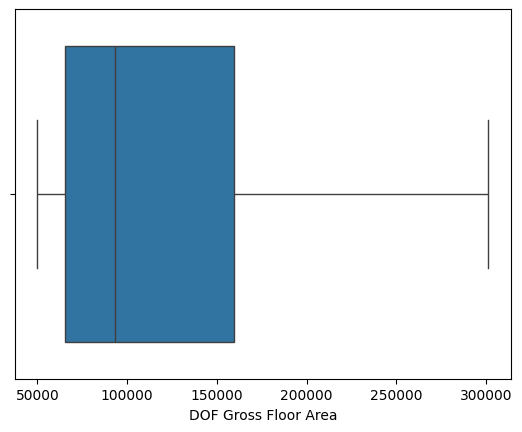

In [142]:
sns.boxplot(data=dfnum , x="DOF Gross Floor Area")

In [143]:
Q1 = dfnum['Community Board'].quantile(0.25)
Q3 = dfnum['Community Board'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

dfnum.loc[dfnum['Community Board'] > UL] = UL
dfnum.loc[dfnum['Community Board'] < LL] = LL


Q1: 5.0 | Q3: 12.0 | IQR: 7.0 | LL: -5.5 | UL: 22.5


C:\Users\Deepak\AppData\Local\Temp\ipykernel_5348\4178803821.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '22.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfnum.loc[dfnum['Community Board'] > UL] = UL


<Axes: xlabel='Community Board'>

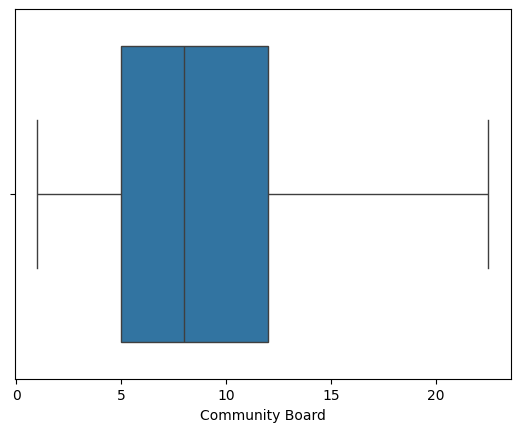

In [144]:
sns.boxplot(data=dfnum , x="Community Board")

Q1: 100.0 | Q3: 100.0 | IQR: 0.0 | LL: 100.0 | UL: 100.0


<Axes: xlabel='Occupancy'>

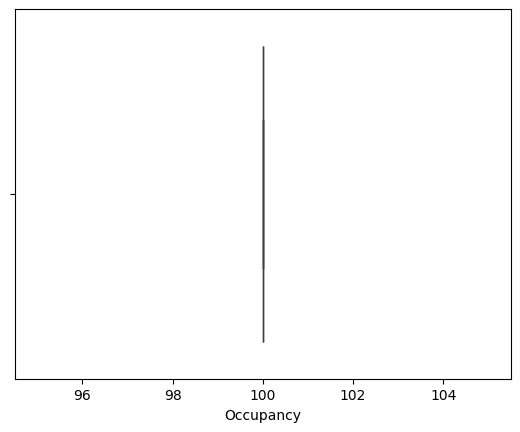

In [145]:
Q1 = dfnum['Occupancy'].quantile(0.25)
Q3 = dfnum['Occupancy'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

dfnum.loc[dfnum['Occupancy'] > UL] = UL
dfnum.loc[dfnum['Occupancy'] < LL] = LL
sns.boxplot(data=dfnum , x="Occupancy")


<h3>As we see that the ocupancy doesn't have valid data so this may decrease our accuracy best is to drop this variable </h3>

In [114]:
dfnum=dfnum.drop("Occupancy",axis=1)

Q1: 54000.0 | Q3: 114796.25 | IQR: 60796.25 | LL: -37194.375 | UL: 205990.625


<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)'>

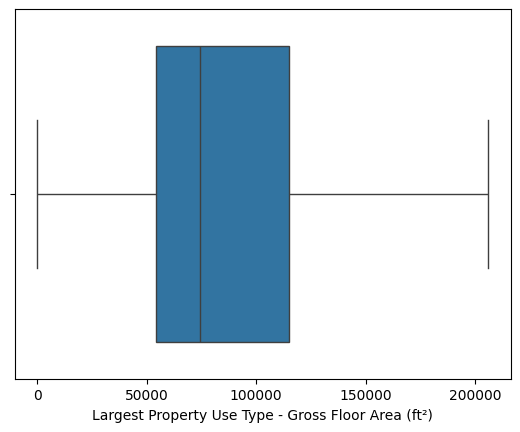

In [146]:
Q1 = dfnum['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.25)
Q3 = dfnum['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

dfnum.loc[dfnum['Largest Property Use Type - Gross Floor Area (ft²)'] > UL] = UL
dfnum.loc[dfnum['Largest Property Use Type - Gross Floor Area (ft²)'] < LL] = LL
sns.boxplot(data=dfnum , x="Largest Property Use Type - Gross Floor Area (ft²)")


<Axes: xlabel='Weather Normalized Site EUI (kBtu/ft²)'>

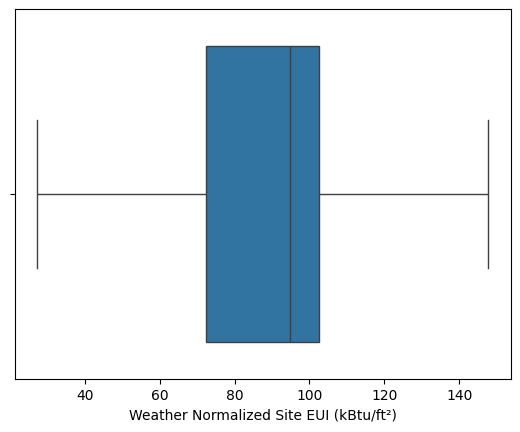

In [147]:
Q1 = dfnum['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.25)
Q3 = dfnum['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.75)

IQR = Q3 -Q1 
LL=Q1 - (1.5 * IQR)
UL=Q3 + (1.5 * IQR)

dfnum.iloc[dfnum['Weather Normalized Site EUI (kBtu/ft²)'] > UL]=UL
dfnum.iloc[dfnum['Weather Normalized Site EUI (kBtu/ft²)'] < LL]=LL
sns.boxplot(data=dfnum ,x="Weather Normalized Site EUI (kBtu/ft²)")

Q1: 147.75 | Q3: 95961.0 | IQR: 95813.25 | LL: -143572.125 | UL: 239680.875


<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)'>

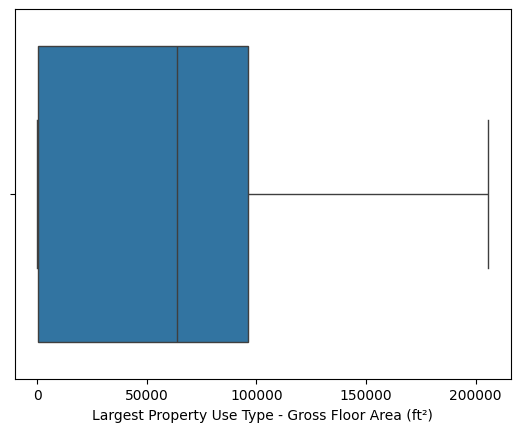

In [148]:
Q1 = dfnum['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.25)
Q3 = dfnum['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

dfnum.loc[dfnum['Largest Property Use Type - Gross Floor Area (ft²)'] > UL] = UL
dfnum.loc[dfnum['Largest Property Use Type - Gross Floor Area (ft²)'] < LL] = LL
sns.boxplot(data=dfnum , x="Largest Property Use Type - Gross Floor Area (ft²)")


Q1: 147.75 | Q3: 1987279.7 | IQR: 1987131.95 | LL: -2980550.175 | UL: 4967977.625


<Axes: xlabel='Electricity Use - Grid Purchase (kBtu)'>

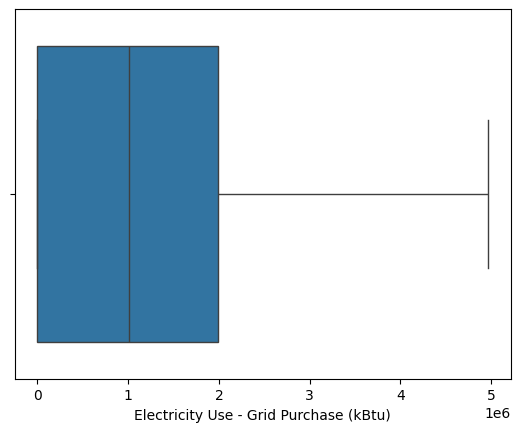

In [149]:
Q1 = dfnum['Electricity Use - Grid Purchase (kBtu)'].quantile(0.25)
Q3 = dfnum['Electricity Use - Grid Purchase (kBtu)'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5 * IQR)
UL = Q3 + (1.5 * IQR)
print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

dfnum.loc[dfnum['Electricity Use - Grid Purchase (kBtu)'] > UL] = UL
dfnum.loc[dfnum['Electricity Use - Grid Purchase (kBtu)'] < LL] = LL
sns.boxplot(data=dfnum , x="Electricity Use - Grid Purchase (kBtu)")


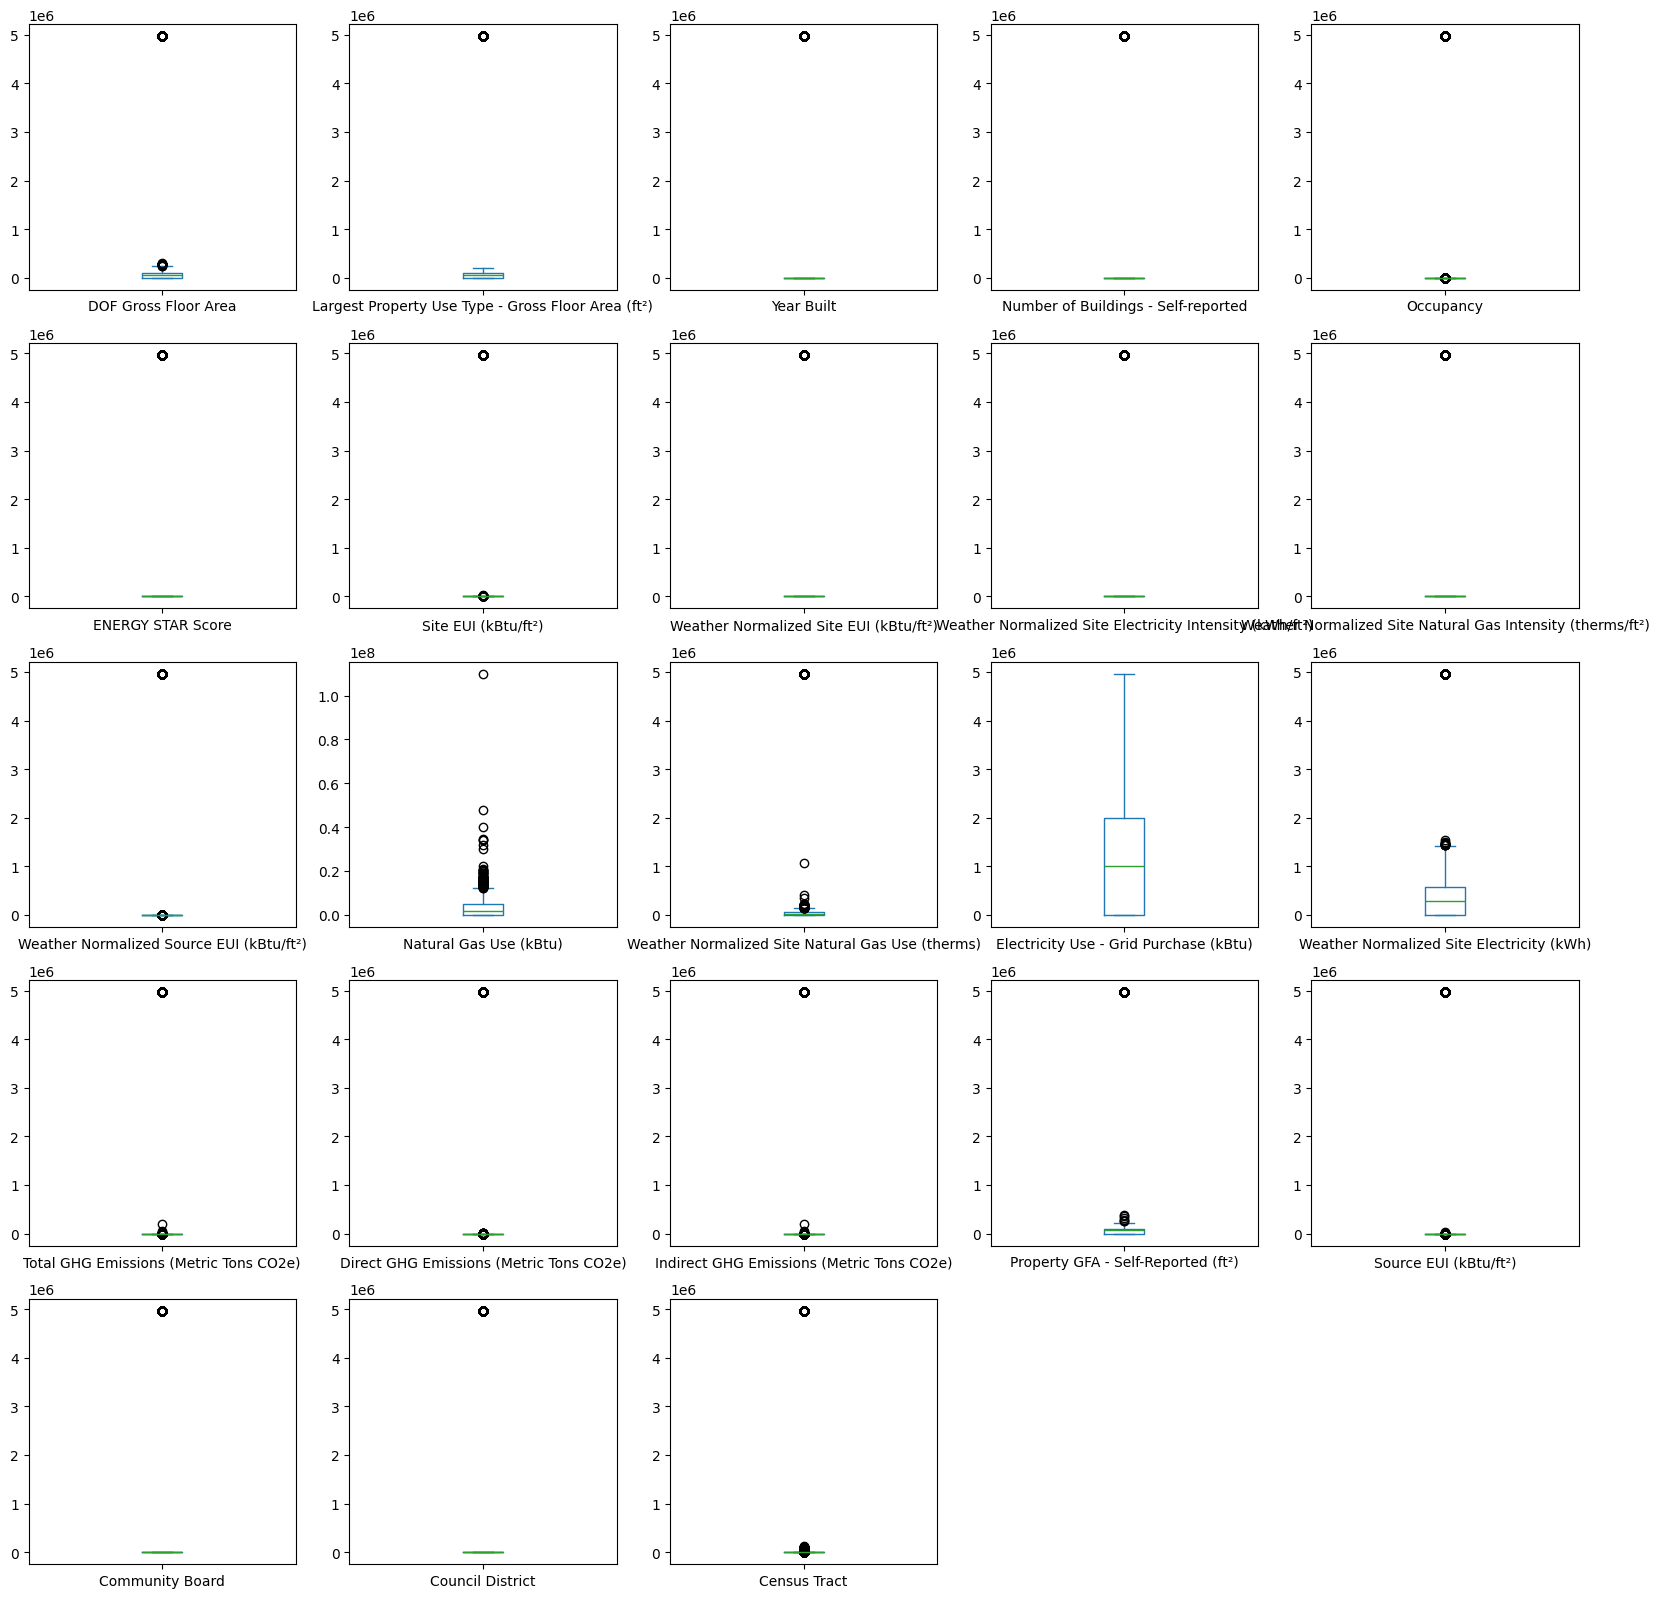

In [150]:
dfnum.plot(kind="box", subplots=True, layout=(5,5), figsize=(20,20))
plt.show()

In [59]:
for columns in data:
    if columns in list_of_cat  :
        data[columns]=le.fit_transform(data[columns])
data.head()

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
0,3025,4437,2310,3679,26,3383,2,289356.0,26,669,24,293447.0,58,1963,2,100,6,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11100000.0,6962.2,0.0,6962.2,762051,619.4,2691,0,6.0,4.0,88.0,121
1,4824,3201,4649,9553,46,1096,2,3693539.0,12,339,12,3889181.0,58,1969,12,100,6,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96300000.0,55870.4,51016.4,4854.1,3889181,404.3,1698,0,12.0,10.0,251.0,128
2,4823,3200,3779,7285,46,2526,2,152765.0,12,339,12,231342.0,58,1924,1,100,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342,NaN,1698,0,12.0,10.0,251.0,128
3,4832,3208,4858,2616,46,905,2,891040.0,12,339,12,1305748.0,58,1971,1,100,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748,NaN,1698,0,12.0,10.0,255.0,128
4,4835,3209,3789,10154,46,1209,2,211400.0,12,339,12,179694.0,58,1932,1,100,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694,NaN,1698,0,12.0,10.0,255.0,128


In [60]:
data.isnull().mean()*100

BBL - 10 digits                                                0.000000
NYC Borough, Block and Lot (BBL) self-reported                 0.000000
NYC Building Identification Number (BIN)                       0.000000
Address 1 (self-reported)                                      0.000000
Postal Code                                                    0.000000
Street Number                                                  0.000000
Borough                                                        0.000000
DOF Gross Floor Area                                           1.004597
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.017027
2nd Largest Property Use Type                                  0.000000
Year Built                                                     0

In [61]:
null_values = ["NTA","Census Tract","Council District","Community Board","Longitude","Latitude","Weather Normalized Site Electricity (kWh)","Weather Normalized Site Natural Gas Use (therms)"
              ,"Weather Normalized Site Natural Gas Use (therms)","Natural Gas Use (kBtu)","Weather Normalized Source EUI (kBtu/ft²)","Weather Normalized Site Natural Gas Intensity (therms/ft²)",
              "Weather Normalized Site Electricity Intensity (kWh/ft²)","Weather Normalized Site EUI (kBtu/ft²)","Site EUI (kBtu/ft²)","ENERGY STAR Score","Largest Property Use Type - Gross Floor Area (ft²)",
              "DOF Gross Floor Area",]
for nullc in data:
    if nullc in null_values:
        data[nullc]=data[nullc].fillna(data[nullc].mean())
        
data

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
0,3025,4437,2310,3679,26,3383,2,2.893560e+05,26,669,24,293447.0,58,1963,2,100,6,59.854594,305.600000,303.100000,37.800000,1.901441,614.200000,5.048542e+07,5.361237e+05,38139374.2,1.110000e+07,6962.2,0.0,6962.2,762051,619.4,2691,0,6.000000,4.000000,88.000000,121
1,4824,3201,4649,9553,46,1096,2,3.693539e+06,12,339,12,3889181.0,58,1969,12,100,6,55.000000,229.800000,228.800000,24.800000,2.400000,401.100000,9.330734e+08,9.330734e+06,332365924.0,9.630000e+07,55870.4,51016.4,4854.1,3889181,404.3,1698,0,12.000000,10.000000,251.000000,128
2,4823,3200,3779,7285,46,2526,2,1.527650e+05,12,339,12,231342.0,58,1924,1,100,7,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.048542e+07,5.361237e+05,NaN,1.768911e+06,0.0,0.0,0.0,231342,NaN,1698,0,12.000000,10.000000,251.000000,128
3,4832,3208,4858,2616,46,905,2,8.910400e+05,12,339,12,1305748.0,58,1971,1,100,7,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.048542e+07,5.361237e+05,NaN,1.768911e+06,0.0,0.0,0.0,1305748,NaN,1698,0,12.000000,10.000000,255.000000,128
4,4835,3209,3789,10154,46,1209,2,2.114000e+05,12,339,12,179694.0,58,1932,1,100,7,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.048542e+07,5.361237e+05,NaN,1.768911e+06,0.0,0.0,0.0,179694,NaN,1698,0,12.000000,10.000000,255.000000,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,7215,7187,7134,4633,196,1433,1,7.064500e+04,23,503,21,74177.0,58,1928,1,100,6,98.000000,81.400000,87.000000,3.300000,0.800000,114.900000,5.179600e+06,5.616890e+04,857323.0,2.452511e+05,354.7,275.1,79.6,74177,109.6,1438,2,2.000000,33.000000,502.000000,14
11742,7245,7204,7161,2246,174,425,1,9.350000e+04,23,544,21,93500.0,28,1926,1,100,6,16.000000,109.300000,117.700000,5.300000,0.900000,160.800000,8.616800e+06,9.535000e+04,1885508.7,5.326727e+05,674.6,499.7,175.0,101291,153.4,1438,2,2.000000,33.000000,7.000000,14
11743,7347,7271,9273,5190,193,4198,5,1.732695e+05,23,503,21,103328.0,58,1913,1,95,6,83.000000,44.300000,43.900000,7.700000,0.200000,101.000000,1.761630e+06,1.813100e+04,2818854.7,7.968372e+05,355.2,93.6,261.6,103328,103.6,239,2,7.140673,15.771275,4977.596647,144
11744,7374,7293,7236,5222,193,1781,1,5.782400e+04,23,503,21,60715.0,58,1928,1,100,6,92.000000,70.000000,74.900000,2.600000,0.700000,96.900000,3.693500e+06,4.016260e+04,556759.9,1.553193e+05,247.8,196.2,51.7,60715,92.7,1438,2,6.000000,39.000000,165.000000,97


In [62]:
data.isnull().mean()*100

BBL - 10 digits                                               0.000000
NYC Borough, Block and Lot (BBL) self-reported                0.000000
NYC Building Identification Number (BIN)                      0.000000
Address 1 (self-reported)                                     0.000000
Postal Code                                                   0.000000
Street Number                                                 0.000000
Borough                                                       0.000000
DOF Gross Floor Area                                          0.000000
Primary Property Type - Self Selected                         0.000000
List of All Property Use Types at Property                    0.000000
Largest Property Use Type                                     0.000000
Largest Property Use Type - Gross Floor Area (ft²)            0.000000
2nd Largest Property Use Type                                 0.000000
Year Built                                                    0.000000
Number

In [63]:
data=data.dropna(axis=0,how='any')

In [64]:
data.isnull().mean()*100

BBL - 10 digits                                               0.0
NYC Borough, Block and Lot (BBL) self-reported                0.0
NYC Building Identification Number (BIN)                      0.0
Address 1 (self-reported)                                     0.0
Postal Code                                                   0.0
Street Number                                                 0.0
Borough                                                       0.0
DOF Gross Floor Area                                          0.0
Primary Property Type - Self Selected                         0.0
List of All Property Use Types at Property                    0.0
Largest Property Use Type                                     0.0
Largest Property Use Type - Gross Floor Area (ft²)            0.0
2nd Largest Property Use Type                                 0.0
Year Built                                                    0.0
Number of Buildings - Self-reported                           0.0
Occupancy 

In [65]:
X=data.drop(["ENERGY STAR Score"],axis=1)
y=data["ENERGY STAR Score"]
X.head()

,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
0,3025,4437,2310,3679,26,3383,2,2.893560e+05,26,669,24,293447.0,58,1963,2,100,6,305.6,303.100000,37.8,1.901441,614.200000,5.048542e+07,5.361237e+05,38139374.2,11100000.0,6962.2,0.0,6962.2,762051,619.4,2691,0,6.000000,4.000000,88.000000,121
1,4824,3201,4649,9553,46,1096,2,3.693539e+06,12,339,12,3889181.0,58,1969,12,100,6,229.8,228.800000,24.8,2.400000,401.100000,9.330734e+08,9.330734e+06,332365924.0,96300000.0,55870.4,51016.4,4854.1,3889181,404.3,1698,0,12.000000,10.000000,251.000000,128
5,3674,2425,4691,8766,32,280,2,2.230742e+06,12,339,12,2971874.0,58,1932,12,100,6,359.9,359.000000,8.3,4.800000,411.500000,1.430000e+09,1.430000e+07,86335350.5,24600000.0,54429.8,77564.1,-23134.3,2971874,414.2,1698,0,8.000000,5.000000,116.000000,71
8,11009,11340,11144,5291,160,1779,3,3.750565e+06,27,744,25,200.0,58,1974,1,100,6,1138.3,1091.500000,319.9,1.901441,3427.300000,5.048542e+07,5.361237e+05,227658.1,63979.9,21.1,0.0,21.1,200,3574.2,2177,1,13.000000,23.000000,155101.000000,54
12,7202,8781,7122,254,174,4198,5,1.732695e+05,23,586,21,412503.0,28,1903,2,100,6,32.0,309.747466,7.5,0.000000,417.915709,2.047200e+06,2.047200e+04,11241926.1,3249755.2,1194.0,150.8,1043.2,432503,87.9,2122,1,7.140673,15.771275,4977.596647,144


In [66]:
y.head()

0     59.854594
1     55.000000
5     55.000000
8     59.854594
12    93.000000
Name: ENERGY STAR Score, dtype: float64

In [67]:
# standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = regressor.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 195.7299077905433
r_square_value : 0.7311977650587826


In [72]:
print("Accuracy of the model  is ",r_squared*100)

Accuracy of the model  is  73.11977650587826


In [ ]:
vif = 1/1-r_squared
if vif<=5 :
    print("multicolinearity")
else :
    print("no multicolinearity")